## Первичный отсмотр данных

импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл

In [616]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [617]:
display(stud.sample(15))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
294,GP,M,18,R,LE3,T,3.0,2.0,services,NaN,reputation,mother,2.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,no,5.0,4.0,2.0,4.0,8.0,70.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
246,GP,M,17,U,GT3,T,2.0,3.0,other,other,course,father,2.0,1.0,0.0,no,NaN,NaN,no,yes,-3.0,yes,yes,no,5.0,2.0,2.0,2.0,4.0,65.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
97,GP,F,16,U,GT3,T,2.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,yes,4.0,3.0,5.0,5.0,2.0,50.0
206,GP,F,16,U,GT3,A,3.0,1.0,services,other,course,mother,1.0,2.0,3.0,no,yes,yes,no,yes,-6.0,yes,yes,no,2.0,3.0,3.0,4.0,5.0,35.0
362,MS,F,18,U,GT3,T,3.0,3.0,services,services,other,NaN,2.0,2.0,0.0,no,yes,no,no,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,0.0,50.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
258,GP,M,18,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,NaN,no,5.0,2.0,4.0,4.0,8.0,70.0
188,GP,F,17,U,GT3,A,3.0,3.0,health,other,reputation,mother,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,6.0,45.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Описание датасета
## В датасете представлены следующие данные:


Посмотрим на переменные, которые содержит датасет:

- +1 school — аббревиатура школы, в которой учится ученик

- +2 sex — пол ученика ('F' - женский, 'M' - мужской)

- 3 age — возраст ученика (от 15 до 22)

- +4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

- +5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

- +6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

- +7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- +8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- +9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

- 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

- 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

- 16 schoolsup — дополнительная образовательная поддержка (yes или no)

- 17 famsup — семейная образовательная поддержка (yes или no)

- 18 paid — дополнительные платные занятия по математике (yes или no)

- 19 activities — дополнительные внеучебные занятия (yes или no)

- 20 nursery — посещал детский сад (yes или no)

- 21 higher — хочет получить высшее образование (yes или no)

- 22 internet — наличие интернета дома (yes или no)

- 23 romantic — в романтических отношениях (yes или no)

- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

- 28 absences — количество пропущенных занятий

- 29 score — баллы по госэкзамену по математике

## Вспомогательные функции

In [618]:
def common_information(field):
    data_len = len(stud[field])
    # вывод общей информации
    print('Колво строк: {}'.format(data_len))
    print('Уникальных значений: {}'.format(stud[field].nunique()))
    print(stud.loc[:, [field]].info())
    # обзор уникальных значений
    df = pd.DataFrame(stud[field].value_counts())
    display(df)
    print('Контроль отсутствующих данных: {}'.format(df.sum()-data_len))
    
def fixIQR(field):
    # вычисление и удаление выбросов 
    median = stud[field].median()
    minRange = stud[field].min()
    maxRange = stud[field].max()
    IQR = stud[field].quantile(0.75) - stud[field].quantile(0.25)
    perc25 = stud[field].quantile(0.25)
    perc75 = stud[field].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    # отображение графика
    stud[field].loc[stud[field].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (minRange, maxRange), label = 'IQR')
    plt.legend();
    # Избавляемся от выборосов
    return stud.loc[stud[field].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

def set_mising_str_to_none(field):
    # отсутствующие данные установим в None
    stud[field] = stud[field].astype(str).apply(lambda x: None if x.strip() == '' else x)

def set_mising_float_to_zero(field, value = 0.0):
    # отсутствующие данные установим в 0
    stud[field] = stud[field].astype(float).apply(lambda x: value if pd.isnull(x) else x)

def get_boxplot(column):
    # График показывает плотность распределения переменных
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()    
    
def get_stat_dif(column):
    # Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Предобработка данных


In [619]:
# переименуем колонки для удобства дальнейшего использования
stud.rename(columns={'studytime, granular': 'granular', 'Pstatus': 'pstatus'}, inplace=True)    
print(stud.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')


In [620]:
# Анализ school
common_information('school')


Колво строк: 395
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None


,school
GP,349
MS,46


Контроль отсутствующих данных: school    0
dtype: int64


данные основаны на отчетности двух школ, большее число данных в выборке представлено для GP. Пропущенных данных нет.

In [621]:
# Анализ sex
common_information('sex')


Колво строк: 395
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None


,sex
F,208
M,187


Контроль отсутствующих данных: sex    0
dtype: int64


выборка не содержит пропущенных значений

In [622]:
# Анализ age
common_information('age')


Колво строк: 395
Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
None


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Контроль отсутствующих данных: age    0
dtype: int64


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

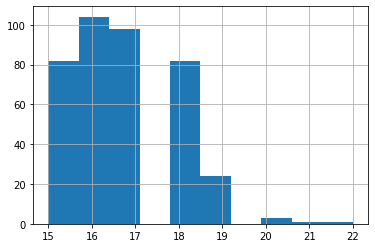

In [623]:
stud.age.hist()
stud.age.describe()

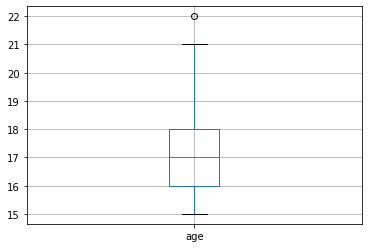

In [624]:
boxplot = stud.boxplot(column=['age'])

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


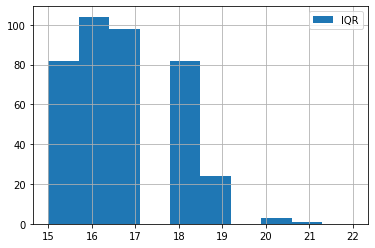

In [625]:
# из графика видно наличие выбросов, требуется обработка данных
# Избавляемся от выбросов
stud = fixIQR('age')


In [626]:
# Анализ address 
set_mising_str_to_none('address')
common_information('address')


Колво строк: 394
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None


,address
U,294
R,83
nan,17


Контроль отсутствующих данных: address    0
dtype: int64


In [627]:
# Анализ famsize 
set_mising_str_to_none('famsize')
common_information('famsize')


Колво строк: 394
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None


,famsize
GT3,260
LE3,107
nan,27


Контроль отсутствующих данных: famsize    0
dtype: int64


In [628]:
# Анализ pstatus
set_mising_str_to_none('pstatus')
common_information('pstatus')


Колво строк: 394
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None


,pstatus
T,313
nan,45
A,36


Контроль отсутствующих данных: pstatus    0
dtype: int64


Колво строк: 394
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None


,Medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,6


Контроль отсутствующих данных: Medu    0
dtype: int64
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


count    394.000000
mean       2.728426
std        1.121093
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

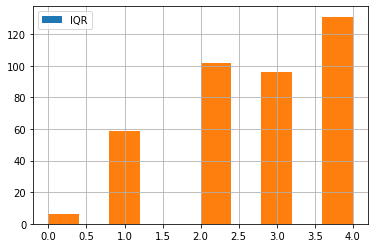

In [629]:
# Анализ Medu 
set_mising_float_to_zero('Medu')
common_information('Medu')
stud = fixIQR('Medu')
stud.Medu.hist()
stud.Medu.describe()


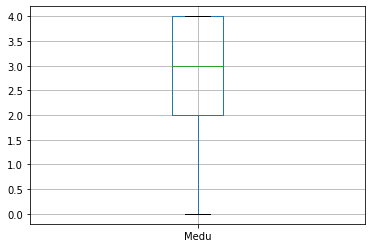

In [630]:
boxplot = stud.boxplot(column=['Medu'])

25-й перцентиль: 1.0, 75-й перцентиль: 3.0, IQR: 2.0,  Границы выбросов: [-2.0, 6.0].


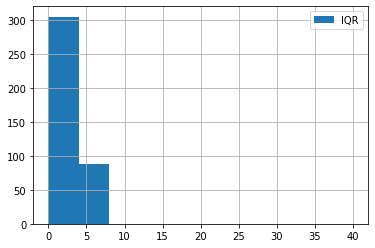

In [631]:
# Анализ Fedu 
set_mising_float_to_zero('Fedu')
stud = fixIQR('Fedu')

Колво строк: 393
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,Fedu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,26


Контроль отсутствующих данных: Fedu    0
dtype: int64


count    393.000000
mean       2.730280
std        1.121917
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

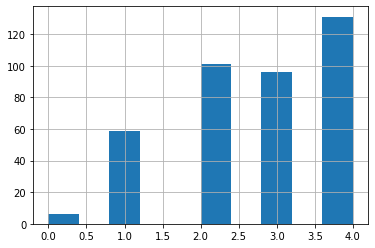

In [632]:
common_information('Fedu')
stud.Medu.hist()
stud.Medu.describe()


In [633]:
# Анализ Mjob 
set_mising_str_to_none('Mjob')
common_information('Mjob')

Колво строк: 393
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,Mjob
other,133
services,96
at_home,58
teacher,55
health,32
nan,19


Контроль отсутствующих данных: Mjob    0
dtype: int64


In [634]:
# Анализ Fjob 
set_mising_str_to_none('Fjob')
common_information('Fjob')

Колво строк: 393
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,Fjob
other,196
services,101
nan,36
teacher,29
at_home,16
health,15


Контроль отсутствующих данных: Fjob    0
dtype: int64


In [635]:
# Анализ reason  
set_mising_str_to_none('reason')
common_information('reason')

Колво строк: 393
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,reason
course,137
home,104
reputation,102
other,33
nan,17


Контроль отсутствующих данных: reason    0
dtype: int64


In [636]:
# Анализ guardian   
set_mising_str_to_none('guardian')
common_information('guardian')

Колво строк: 393
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,guardian
mother,249
father,85
nan,31
other,28


Контроль отсутствующих данных: guardian    0
dtype: int64


Колво строк: 393
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,traveltime
1.0,241
2.0,96
0.0,28
3.0,21
4.0,7


Контроль отсутствующих данных: traveltime    0
dtype: int64
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


count    386.000000
mean       1.284974
std        0.677376
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: traveltime, dtype: float64

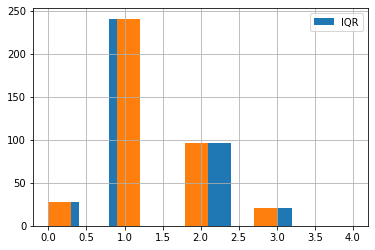

In [637]:
# Анализ traveltime 
set_mising_float_to_zero('traveltime')
common_information('traveltime')
stud = fixIQR('traveltime')
stud.traveltime.hist()
stud.traveltime.describe()


Колво строк: 386
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  386 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB
None


,studytime
2.0,192
1.0,99
3.0,62
4.0,26
0.0,7


Контроль отсутствующих данных: studytime    0
dtype: int64
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


count    360.000000
mean       1.858333
std        0.711574
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: studytime, dtype: float64

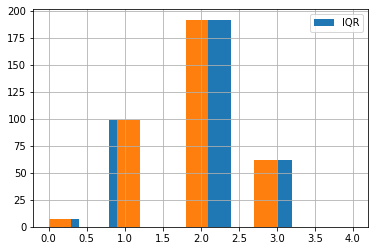

In [638]:
# Анализ studytime  
set_mising_float_to_zero('studytime')
common_information('studytime')
stud = fixIQR('studytime')
stud.studytime.hist()
stud.studytime.describe()


Колво строк: 360
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB
None


,failures
0.0,284
1.0,48
2.0,16
3.0,12


Контроль отсутствующих данных: failures    0
dtype: int64


count    360.000000
mean       0.322222
std        0.713230
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

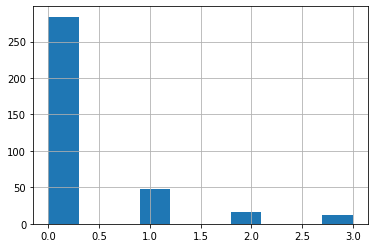

In [639]:
# Анализ failures   
set_mising_float_to_zero('failures')
common_information('failures')
stud.failures.hist()
stud.failures.describe()

In [640]:
# Анализ schoolsup  
set_mising_str_to_none('schoolsup')
common_information('schoolsup')

Колво строк: 360
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
None


,schoolsup
no,307
yes,44
nan,9


Контроль отсутствующих данных: schoolsup    0
dtype: int64


In [641]:
# Анализ famsup  
set_mising_str_to_none('famsup')
common_information('famsup')

Колво строк: 360
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
None


,famsup
yes,198
no,127
nan,35


Контроль отсутствующих данных: famsup    0
dtype: int64


In [642]:
# Анализ paid  
set_mising_str_to_none('paid')
common_information('paid')

Колво строк: 360
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
None


,paid
no,183
yes,139
nan,38


Контроль отсутствующих данных: paid    0
dtype: int64


In [643]:
# Анализ activities   
set_mising_str_to_none('activities')
common_information('activities')

Колво строк: 360
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
None


,activities
yes,175
no,172
nan,13


Контроль отсутствующих данных: activities    0
dtype: int64


In [644]:
# Анализ nursery   
set_mising_str_to_none('nursery')
common_information('nursery')

Колво строк: 360
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
None


,nursery
yes,271
no,73
nan,16


Контроль отсутствующих данных: nursery    0
dtype: int64


In [645]:
# Анализ higher    
set_mising_str_to_none('higher')
common_information('higher')

Колво строк: 360
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
None


,higher
yes,325
nan,18
no,17


Контроль отсутствующих данных: higher    0
dtype: int64


In [646]:
# Анализ higher    
set_mising_str_to_none('internet')
common_information('internet')

Колво строк: 360
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
None


,internet
yes,276
no,51
nan,33


Контроль отсутствующих данных: internet    0
dtype: int64


In [647]:
# Анализ romantic     
set_mising_str_to_none('romantic')
common_information('romantic')

Колво строк: 360
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
None


,romantic
no,218
yes,115
nan,27


Контроль отсутствующих данных: romantic    0
dtype: int64


In [648]:
# Анализ famrel   
set_mising_float_to_zero('famrel')
stud['famrel'] = stud['famrel'].astype(float).apply(lambda x: -x if x < 0 else x)
common_information('famrel')


Колво строк: 360
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB
None


,famrel
4.0,167
5.0,88
3.0,57
0.0,26
2.0,16
1.0,6


Контроль отсутствующих данных: famrel    0
dtype: int64


count    360.000000
mean       3.658333
std        1.332030
min        0.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

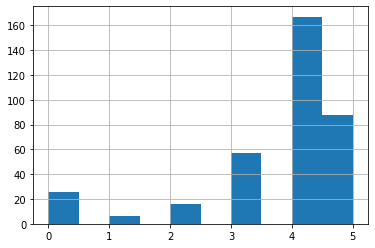

In [649]:
stud.famrel.hist()
stud.famrel.describe()

In [650]:
# Анализ freetime   
set_mising_float_to_zero('freetime')
common_information('freetime')
#stud = fixIQR('freetime')

Колво строк: 360
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB
None


,freetime
3.0,140
4.0,106
2.0,56
5.0,33
1.0,15
0.0,10


Контроль отсутствующих данных: freetime    0
dtype: int64


count    360.000000
mean       3.155556
std        1.101138
min        0.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

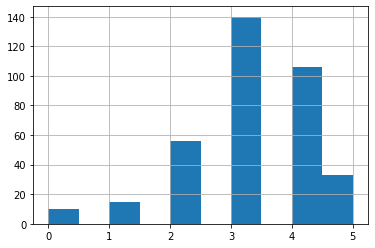

In [651]:
stud.freetime.hist()
stud.freetime.describe()

In [652]:
# Анализ goout    
set_mising_float_to_zero('goout')
common_information('goout')
#stud = fixIQR('freetime')

Колво строк: 360
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB
None


,goout
3.0,117
2.0,89
4.0,81
5.0,43
1.0,22
0.0,8


Контроль отсутствующих данных: goout    0
dtype: int64


count    360.000000
mean       3.027778
std        1.182182
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

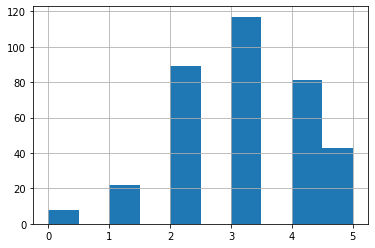

In [653]:
stud.goout.hist()
stud.goout.describe()

In [654]:
# Анализ health     
set_mising_float_to_zero('health')
common_information('health')
#stud = fixIQR('freetime')

Колво строк: 360
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB
None


,health
5.0,131
3.0,78
4.0,57
1.0,42
2.0,41
0.0,11


Контроль отсутствующих данных: health    0
dtype: int64


count    360.000000
mean       3.447222
std        1.508562
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

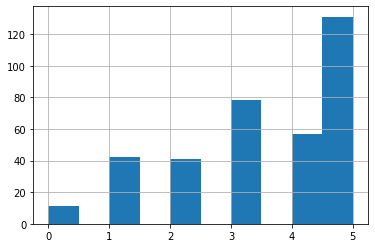

In [655]:
stud.health.hist()
stud.health.describe()

Колво строк: 360
Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  360 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB
None


,absences
0.0,113
2.0,57
4.0,48
6.0,24
8.0,18
10.0,15
12.0,11
14.0,11
3.0,8
16.0,6


Контроль отсутствующих данных: absences    0
dtype: int64
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


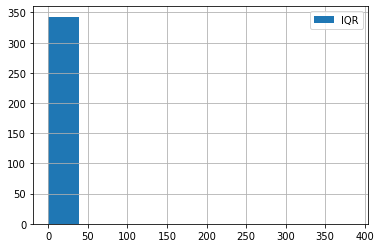

In [656]:
# Анализ absences      
set_mising_float_to_zero('absences')
common_information('absences')
stud = fixIQR('absences')

count    343.000000
mean       4.440233
std        5.018249
min        0.000000
25%        0.000000
50%        2.000000
75%        6.500000
max       20.000000
Name: absences, dtype: float64

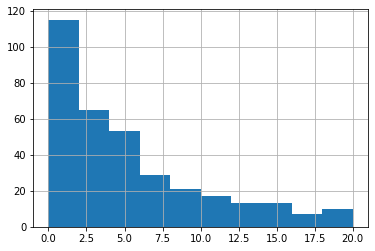

In [657]:
stud.absences.hist()
stud.absences.describe()

Колво строк: 343
Уникальных значений: 17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   343 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB
None


,score
50.000000,48
55.000000,38
0.000000,34
75.000000,31
65.000000,28
60.000000,28
40.000000,24
70.000000,24
45.000000,22
80.000000,15


Контроль отсутствующих данных: score    0
dtype: int64
25-й перцентиль: 42.5, 75-й перцентиль: 70.0, IQR: 27.5,  Границы выбросов: [1.25, 111.25].


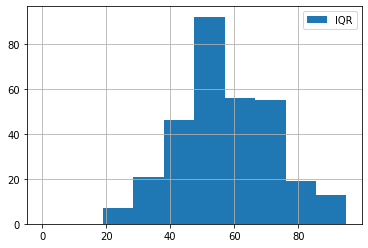

In [658]:
# Анализ score       
set_mising_float_to_zero('score', stud.score.mean())
common_information('score')
stud = fixIQR('score')


count    309.000000
mean      57.724977
std       15.735168
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max       95.000000
Name: score, dtype: float64

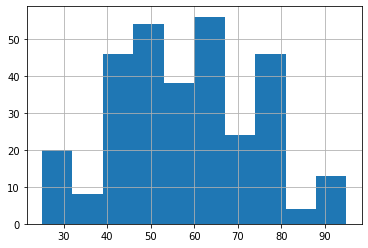

In [659]:
stud.score.hist()
stud.score.describe()

### Корреляционный анализ

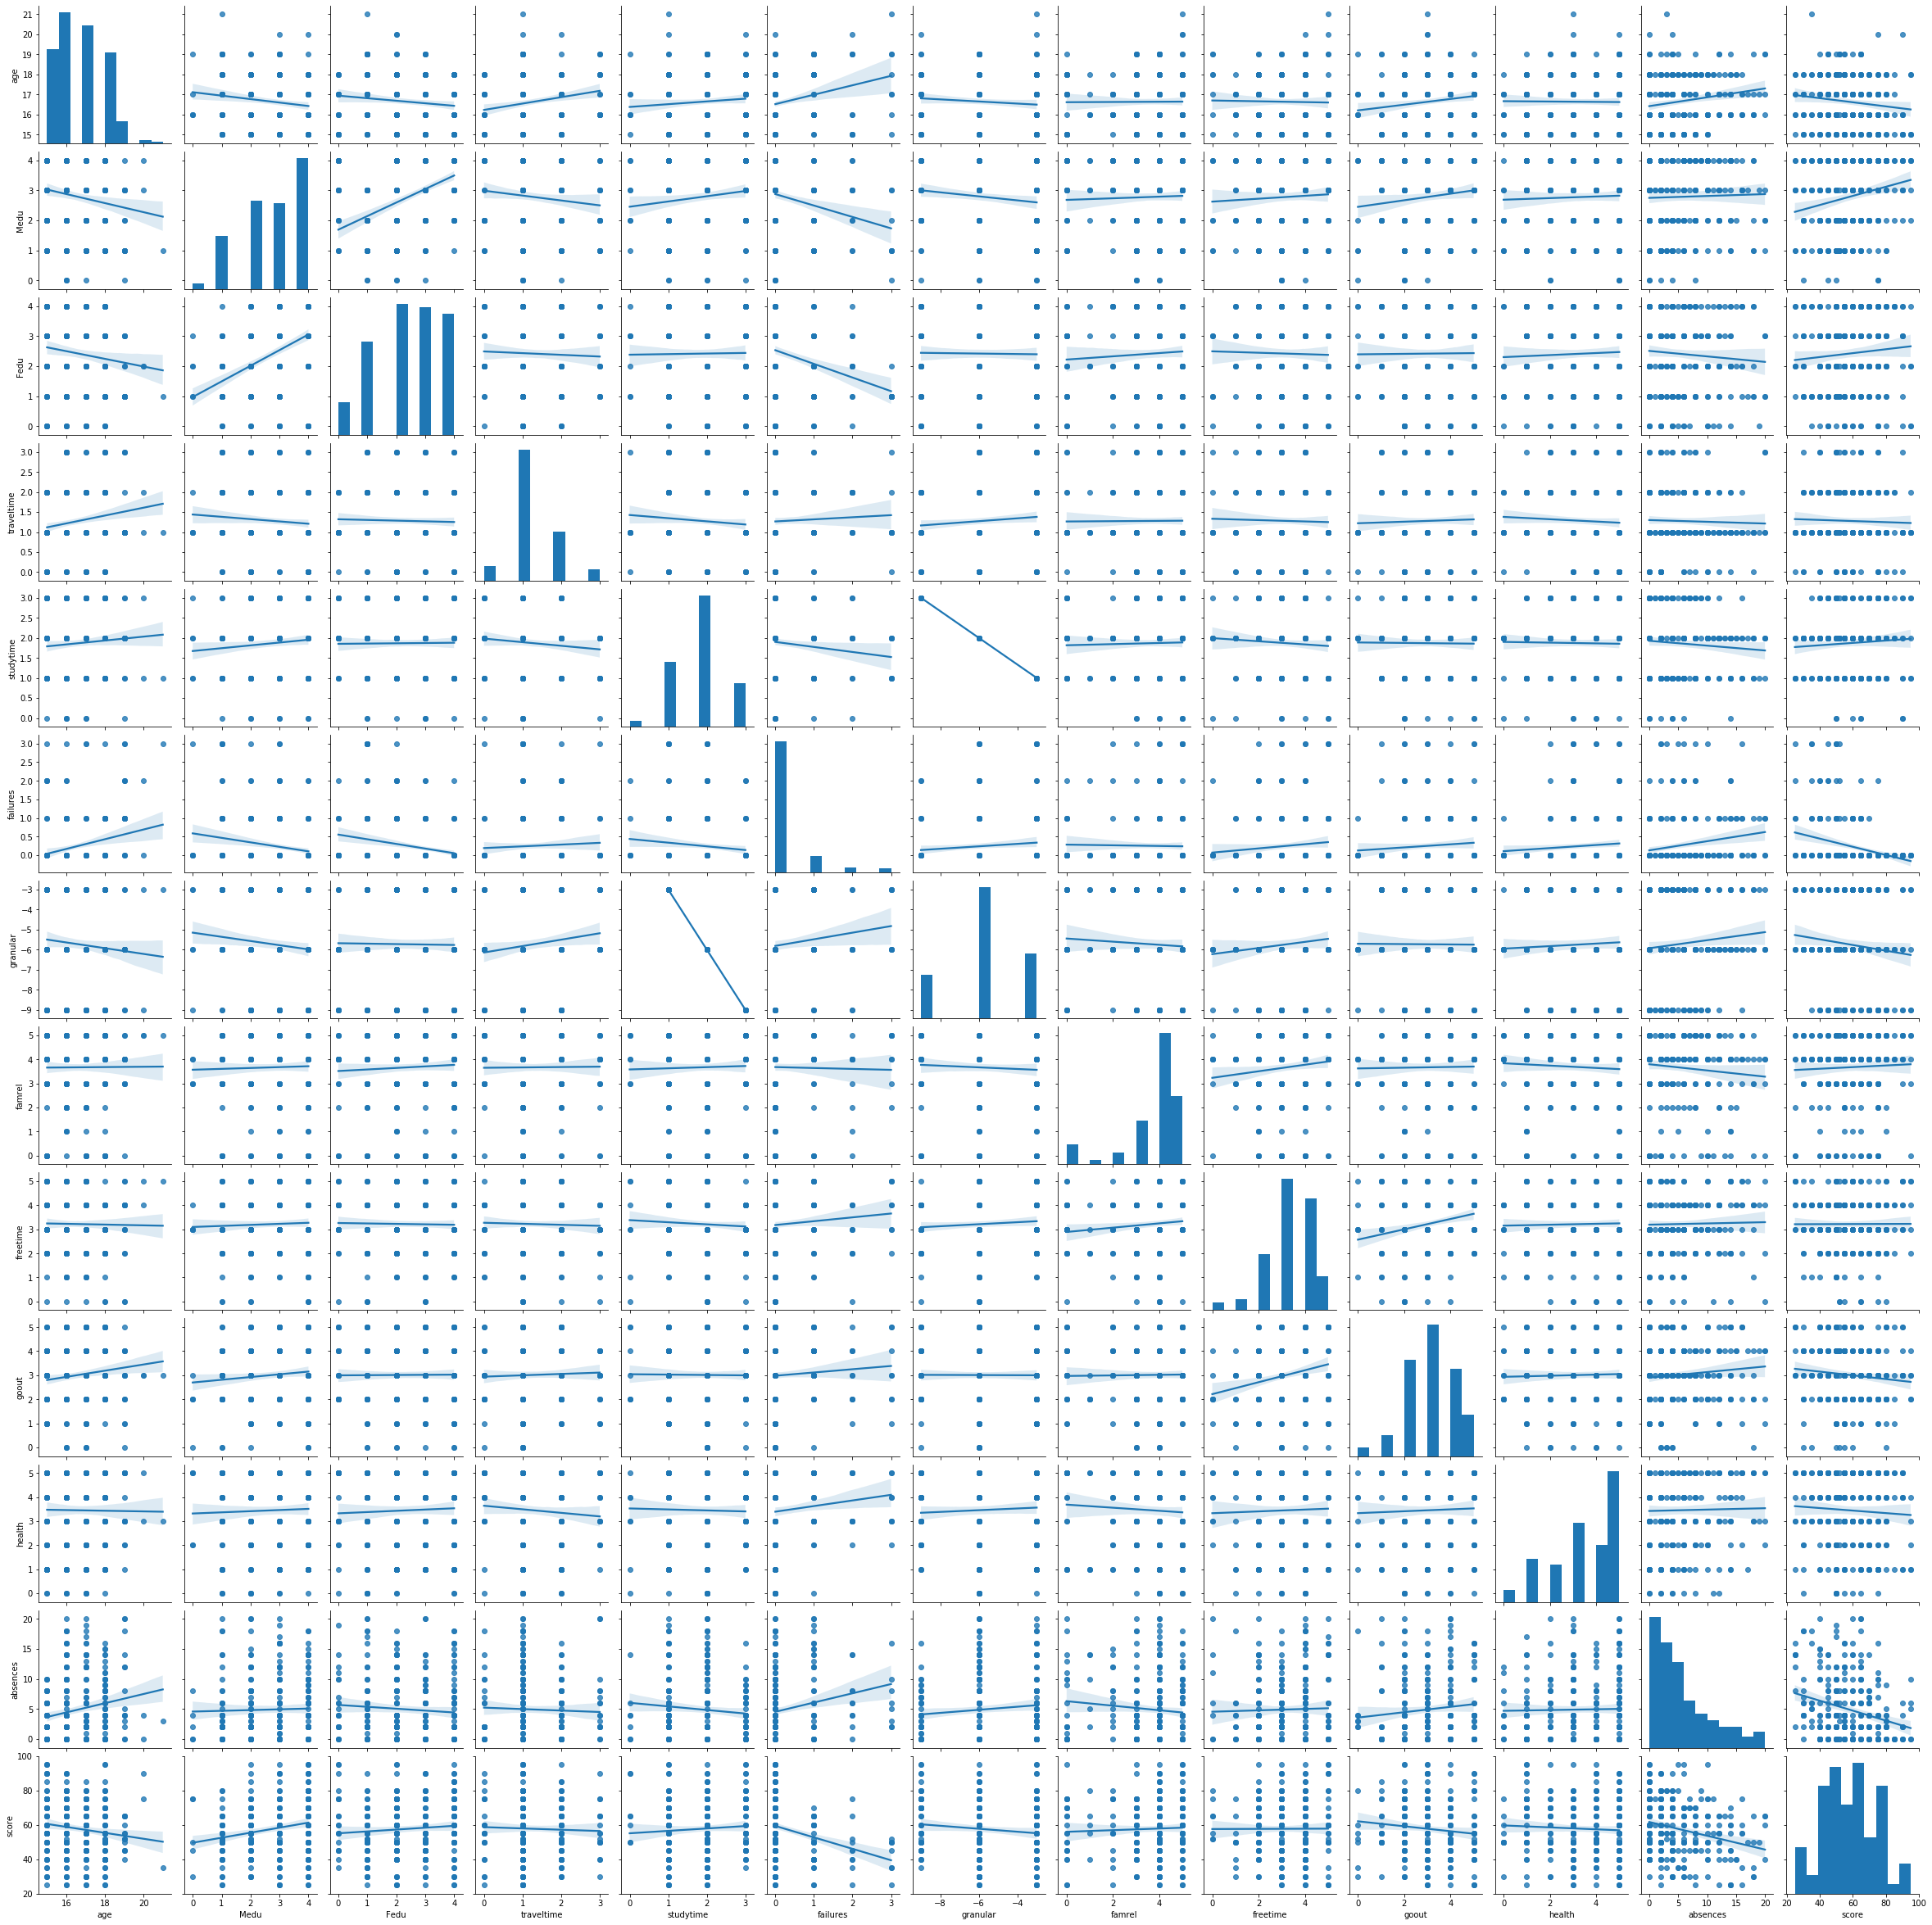

In [660]:
sns.pairplot(stud, kind = 'reg')

In [661]:
cacao.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


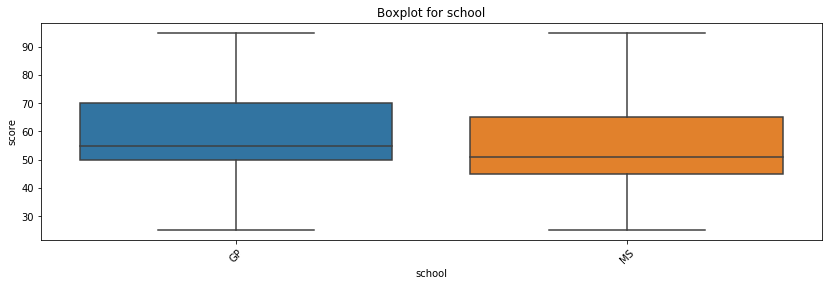

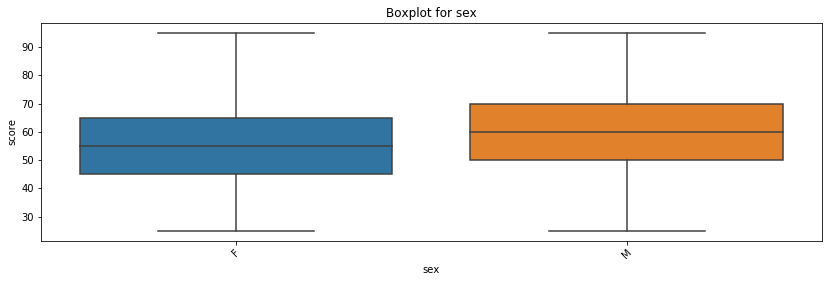

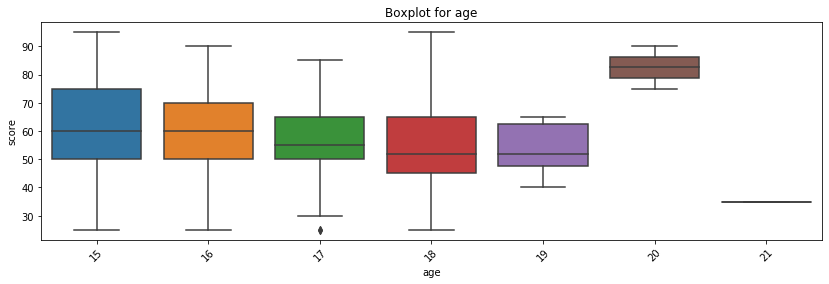

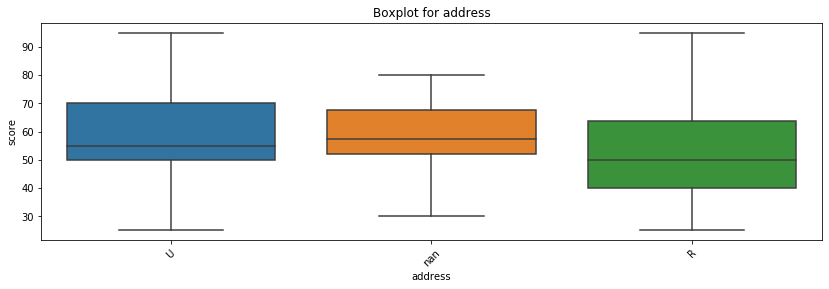

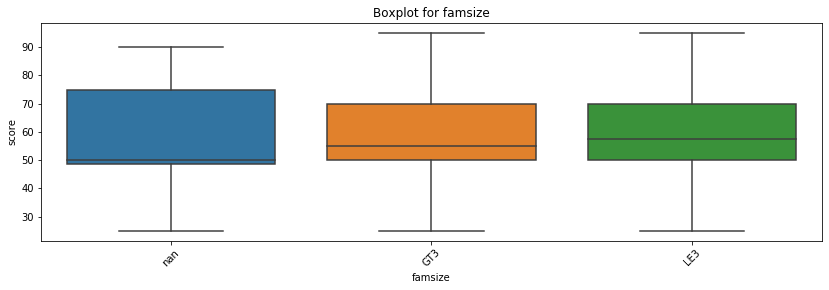

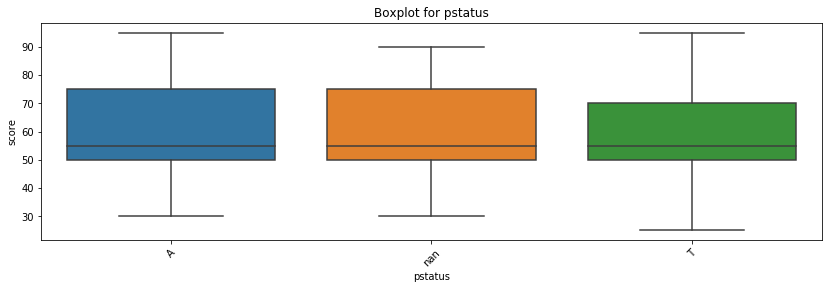

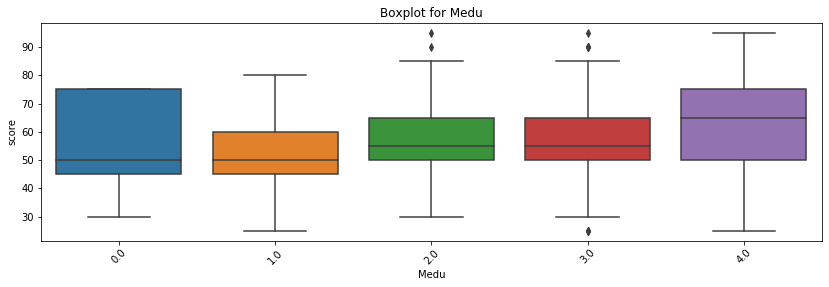

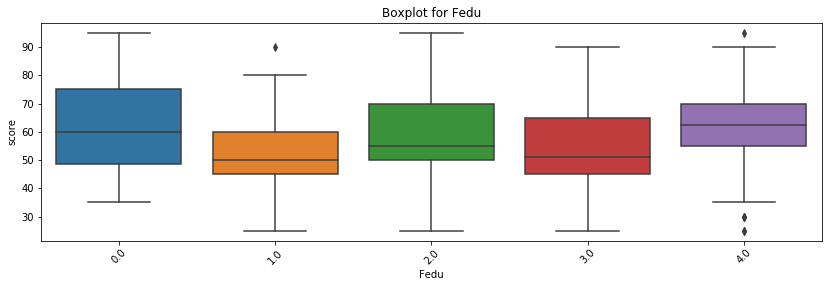

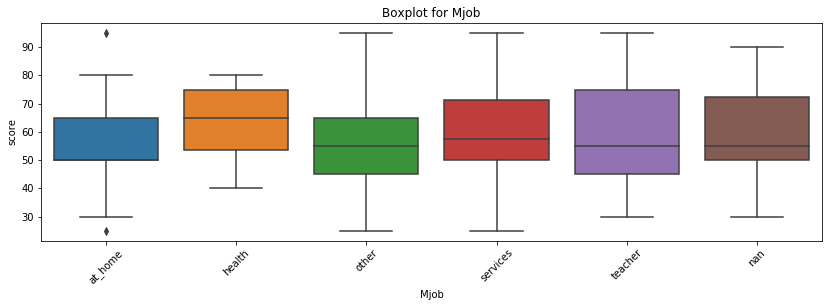

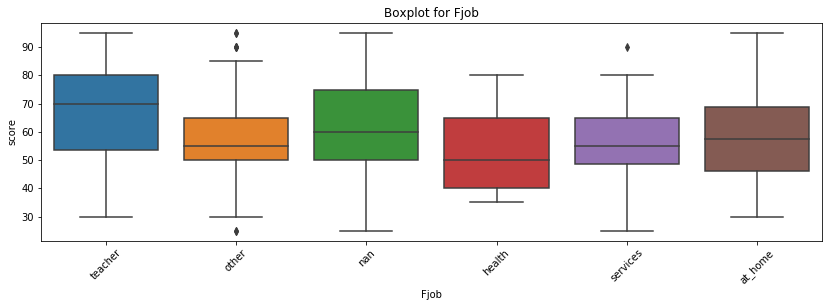

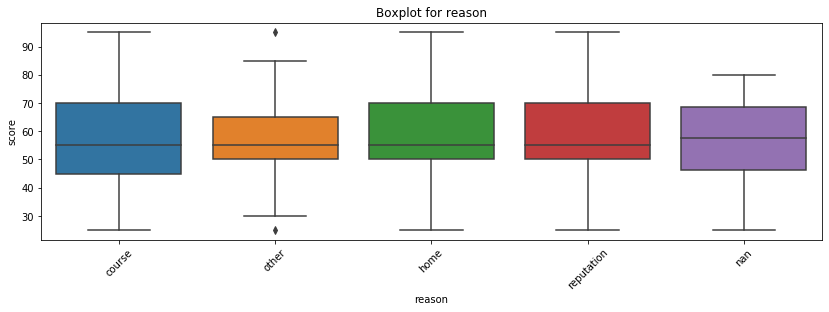

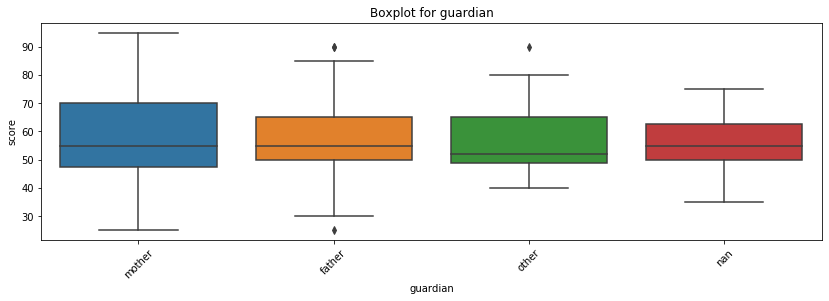

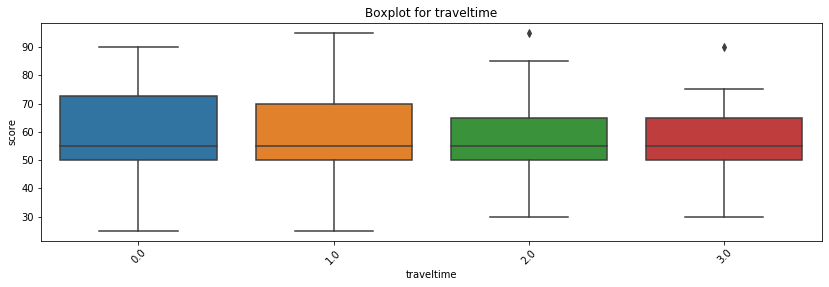

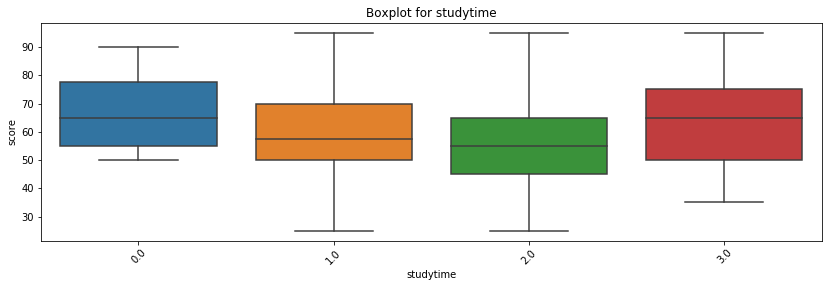

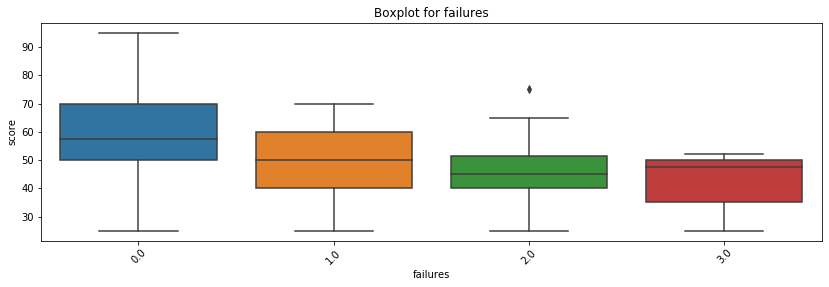

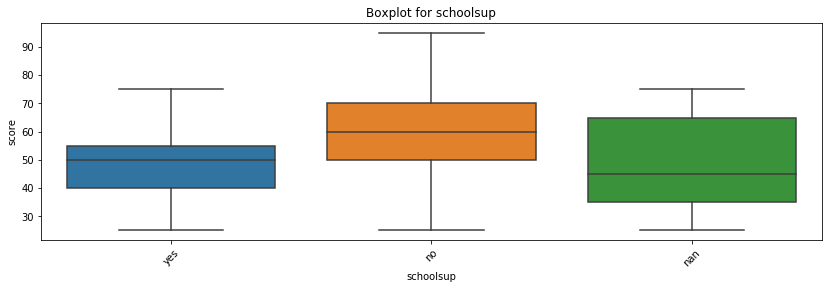

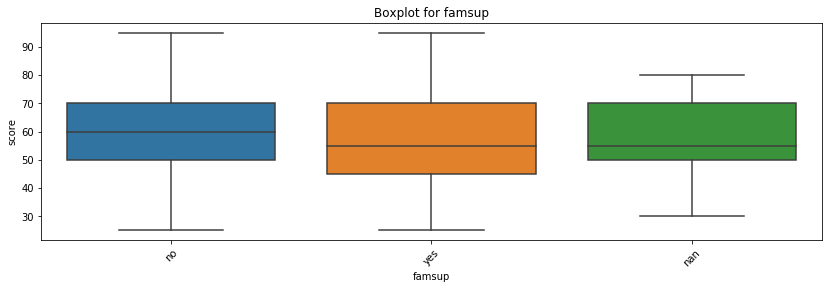

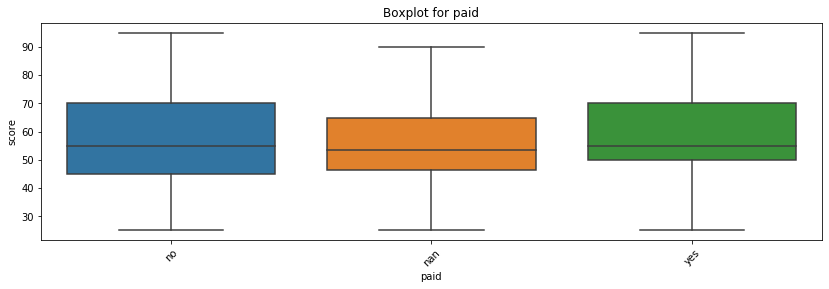

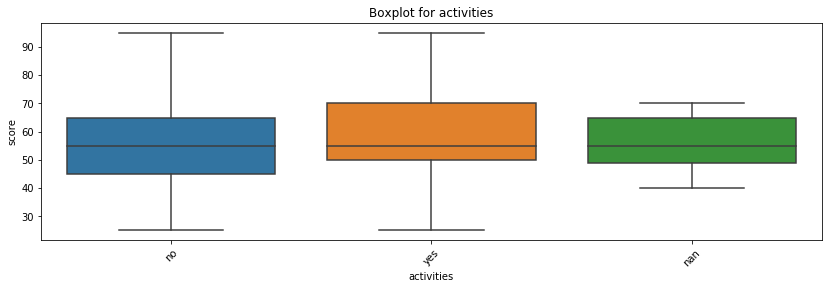

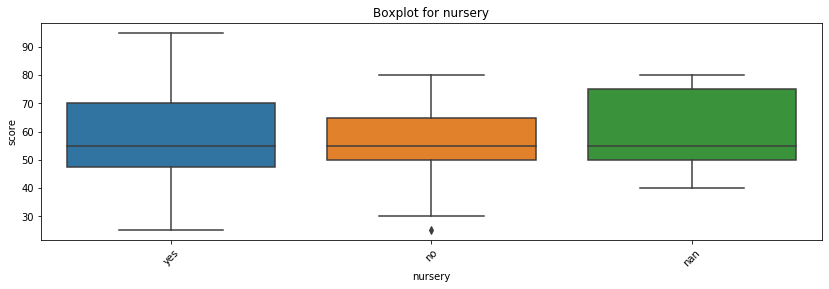

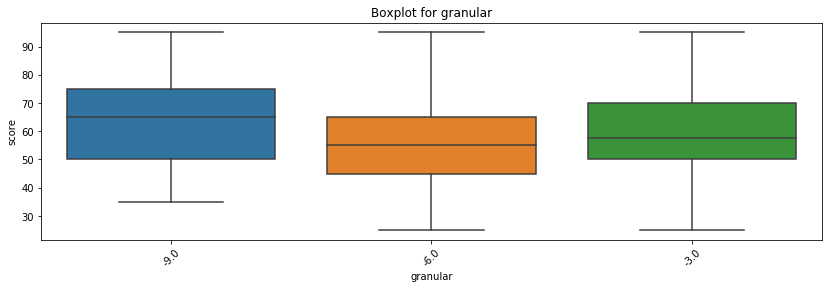

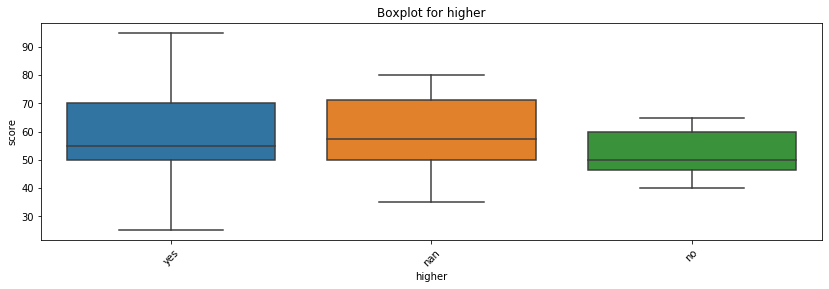

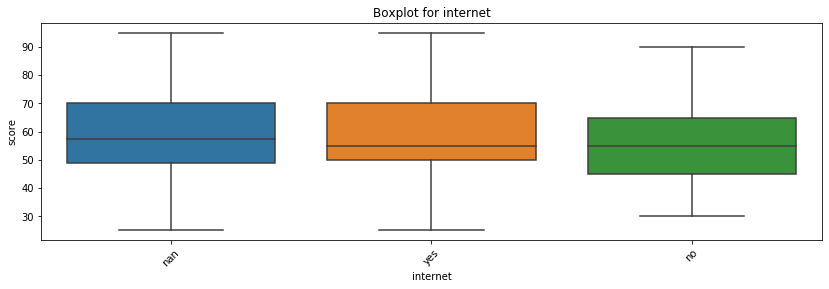

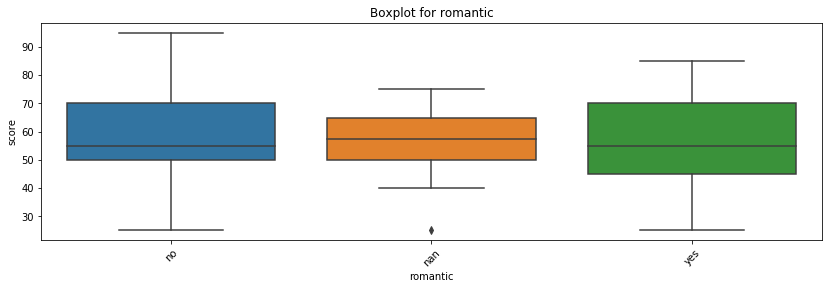

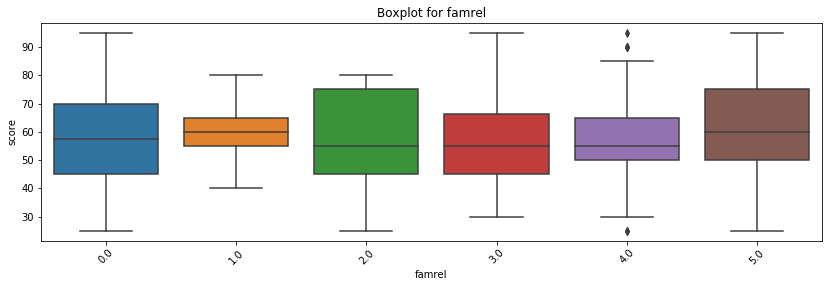

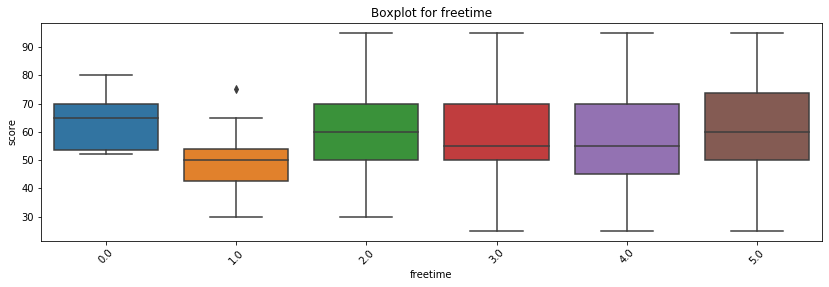

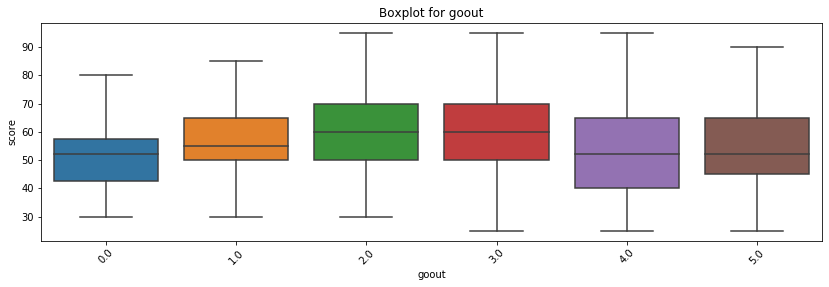

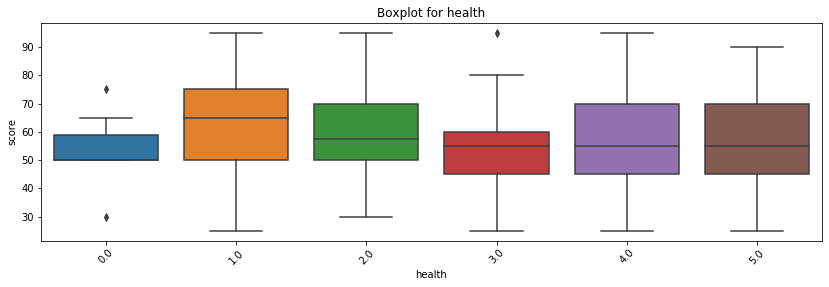

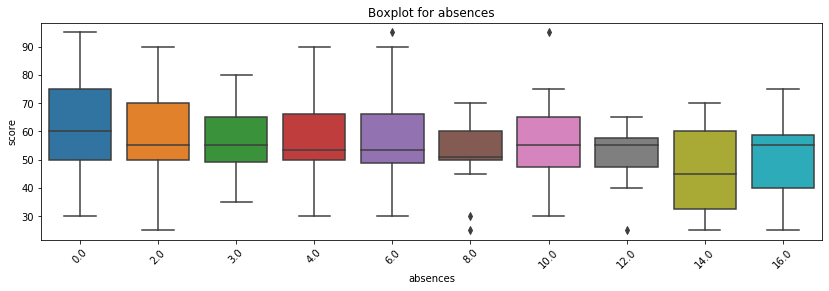

In [662]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences']:
    get_boxplot(col)

In [663]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu


C:\Users\Constructor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Constructor\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Constructor\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Constructor\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Constructor\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки granular
Найдены статистически значимые различия для колонки health


In [667]:
# подготовим данные для модели, оставив статистически значимые колонки
stud_for_model = stud.loc[:, ['sex', 'age', 'address', 'Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'granular', 'health','score']]
stud_for_model.head()

,sex,age,address,Medu,Fedu,studytime,failures,schoolsup,granular,health,score
0,F,18,U,4.0,4.0,2.0,0.0,yes,-6.0,3.0,30.0
1,F,17,U,1.0,1.0,2.0,0.0,no,-6.0,3.0,30.0
2,F,15,U,1.0,1.0,2.0,3.0,yes,-6.0,3.0,50.0
3,F,15,U,4.0,2.0,3.0,0.0,no,-9.0,5.0,75.0
4,F,16,U,3.0,3.0,2.0,0.0,no,-6.0,5.0,50.0


## Выводы

Итак, в результате EDA для анализа влияния параметров окружения учащихся на оценку по математике были получены следующие выводы:

- В данных мало пустых значений, все они были установлены отдельным значением и не удалялись из таблицы.
- Найденные выборы были исключены из таблицы.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Найдены статистически значимые различия для колонки sex, age, address, Medu, Fedu, studytime, failures, schoolsup, granular, health.